# Clean system with periodic drive

\begin{align}
H =& 
\begin{cases}
	H_1 =\hbar g (1-\epsilon_A) \sum_{i \in A}\sigma^x_i + \hbar g (1-\epsilon_B) \sum_{i \in B}\sigma^x_i & ; 0\leq t < T_1\\
	H_2 =\hbar \sum_{i\neq j} \frac{J}{|i-j|^\beta} \sigma^y_i \sigma^y_{j} + \hbar (-h \sin(\omega t)) \sum_i \sigma^z_i & ; T_1\leq t < T	
\end{cases}
\label{eq:cleanham}
\end{align}

# Entanglement Entropy


let us investigate the degrees of entanglement between time crystal(region A) and MBL parts(region B)\\



$S_B (t)=  -Tr_{B} \Big[\hat{\rho}_B ln \hat{\rho}_B\Big]$, where $\hat{\rho}_B(t) = Tr_{A}\Big[|\Psi(t)\rangle \langle \Psi(t)|\Big]$

The numerical method to find out the entropy entanglement with help of qutip and other python modules.

1. There is a method in qutip called "ptrace(some integer)" which is the key method for obtaining partial trace from density matrix.
2. Firstly, we start from the wavefunction say $| \Psi \rangle$ at time t = 0. and then compute density matrix $\rho = | \Psi \rangle \langle \Psi |$.
3.  Next, we reshape the dimension of the $\rho$ by putting "dims = [[2 $**$ N1,2$**$N1],[2$**$N1, 2$**$N1]]". Here N1 is the number half of the total spin length composite system. This is possible because the system we have taken is bipartile, i.e. we can devide the system in two parts equally. If the system was like 4 spins in region A and 2 spiin in region B, then we have to change the dimension as "dims = [[2$**$4,2$**$2],[2$**$4, 2$**$2]]". Finally we make it Qobj because qutip can understand only "Qobj". 
4. Next, we use ptrace(some integer for region A or region B).
5.  At last use entropy_vn(rho) to get the von Neumann Entanglement Entropy.

Ref:

[1] A. Sakurai et al. Phys. Rev. Lett. 126, 120606(2021)

[2] Pekik et al. Phys. Rev. B. 100, 214311(2019)

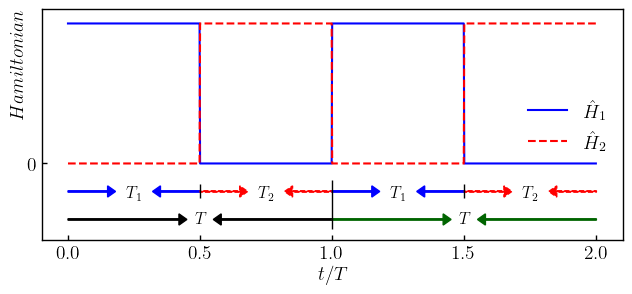

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

plt.rcParams.update({"figure.figsize": (7.5, 3.0),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 14,"font.sans-serif": ["Liberation Sans"], "axes.edgecolor": "black", "axes.linewidth": 1.0})

T = 1
w =  2 * np.pi/T
t = np.linspace(0,2*T,1000, endpoint= False)

sint = -np.sin(w*t)
for i in range(len(t)):
    if sint[i]<=0:
        sint[i] = 0        
        
sqr1 = signal.square(w* t)
for i in range(len(t)):
    if sqr1[i] <0:
        sqr1[i]= 0
        
sqr2 = -signal.square(w* t)
for i in range(len(t)):
    if sqr2[i] <0:
        sqr2[i]= 0
        
plt.plot(t,sqr1,label = r'$\hat{H}_1$', color='blue', alpha =1.)
plt.plot(t,sqr2,label = r'$\hat{H}_2$', linestyle='--',  color='red')

plt.arrow(0, -.2, 0.18, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'blue')
plt.arrow(0.5, -.2, -0.18, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'blue')
plt.text(0.22, -.25, r"$T_1$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(0.5, -.2, 0.18, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'red',linestyle = '--')
plt.arrow(1., -.2, -0.18, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'red',linestyle = '--')
plt.text(.72, -.25, r"$T_2$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(1, -.2, 0.18, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'blue')
plt.arrow(1.5, -.2, -0.18, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'blue')
plt.text(1.22, -.25, r"$T_1$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(1.5, -.2, 0.18, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'red',linestyle = '--')
plt.arrow(2., -.2, -0.18, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'red',linestyle = '--')
plt.text(1.72, -.25, r"$T_2$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(0, -.4, 0.45, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'black')
plt.arrow(1, -.4, -0.45, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'black')
plt.text(.48, -.43, r"$T$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(1, -.4, 0.45, 0, width=0.01, head_width=.08, head_length = 0.03,length_includes_head= True, color = 'darkgreen')
plt.arrow(2, -.4, -0.45, 0, width=0.01, head_width=.08, head_length = 0.03, length_includes_head= True, color = 'darkgreen')
plt.text(1.48, -.43, r"$T$", fontsize=12, bbox=dict(facecolor='white', alpha=0.0))

plt.arrow(1., -.47, 0.0, 0.35, width=0.0001, head_width=0, head_length = 0.0,length_includes_head= False, color = 'black')
plt.arrow(0.5, -.25, 0.0, 0.1, width=0.0001, head_width=0, head_length = 0.0,length_includes_head= False, color = 'black')
plt.arrow(1.5, -.25, 0.0, 0.1, width=0.0001, head_width=0, head_length = 0.0,length_includes_head= False, color = 'black')

plt.xlabel(r"$t/T$", labelpad =1.5)
plt.ylabel(r"$Hamiltonian$", labelpad =0.0, fontsize = 14, loc = 'top')
plt.yticks([0])
plt.xticks([0,0.5,1,1.5,2])
plt.ylim(-.55,1.1)

plt.tick_params(which='both', axis="x", direction="in", width= 1.0)
plt.tick_params(which='both', axis="y", direction="in", width= 1.0, labelbottom=False)

plt.legend(frameon = False, fontsize=14, loc= 7)

plt.savefig('drive_distribution.pdf', bbox_inches='tight', pad_inches=0.0,dpi = 600)
plt.show()

# strong coupling

beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
beta= 0.0 xx= 4
beta= 1.5 xx= 5
beta= 2.5 xx= 6
beta= inf xx= 7
CPU times: user 9.04 s, sys: 2.82 s, total: 11.9 s
Wall time: 2min 17s


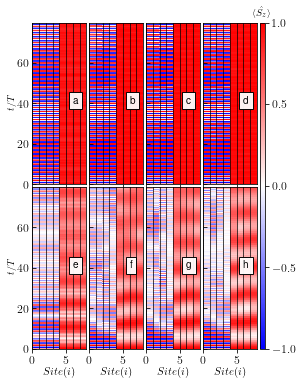

In [7]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
from funcs import *

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 801, endpoint=False)

ea, eb = 0.03, 0.9
ft = 10    # fintsize
g = np.pi/T
Jvalue = 0.2/T     # finite interaction strong coupling
#Jvalue = 0.072/T     # finite interaction weak coupling
#Jvalue = 0.0       # infinite interaction
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.3,0.3,0.3,0.3]
hpts = [jn_zeros(0,3)[0], 6.0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']

lamb = 0.0 
lambd_x = lamb
lambd_y = lamb

figname = 'mz_long_nonfr_weakJ.jpeg'
nprocs = N
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 

h0 = 0.0
ll = 0
fig = plt.figure()
grid = ImageGrid(fig, 111,nrows_ncols = (2,4),axes_pad = 0.04,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
sx,sy,sz = sigmax(), sigmay(), sigmaz()
xx = 0.0
for hh,hpt in enumerate(hpts):
    h = hpt * w/4
    for b, beta in enumerate(betas):
        sz_os = [] 
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        datap = np.zeros((N, len(times)))
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
            
        for m,i in enumerate(spinposition_B):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]

        #data = p.map(run_dynm,tqdm(params, position=0, leave=True))
        data = p.map(run_dynm,params)
        for i in range(N):
            datap[i] = data[i][0]

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=10, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=11, labelpad=0.0)
        grid[xx].set_ylabel(r'$t/T$', fontsize=10, labelpad=0.0)
        
        #grid[xx].tick_params(which='both', axis="x", direction="in")
        grid[xx].tick_params(which='both', axis="y", direction="in")
        xx=xx+1
        
cbticks = np.linspace(-1,1,5)
#plt.colorbar(imc, cax=grid.cbar_axes[0], label=r"$\langle\hat{S_z}\rangle$") 
clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 10)     
figname = "sz_t_strongJ_N_" + str(N) +'.jpeg'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi=600)

### weak coupling

beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
beta= 0.0 xx= 4
beta= 1.5 xx= 5
beta= 2.5 xx= 6
beta= inf xx= 7
CPU times: user 8.32 s, sys: 2.77 s, total: 11.1 s
Wall time: 1min 57s


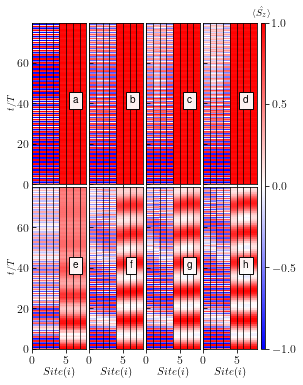

In [8]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
from funcs import *

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 501, endpoint=False)

ea, eb = 0.03, 0.9
ft = 10    # fintsize
g = np.pi/T
#Jvalue = 0.2/T     # finite interaction strong coupling
Jvalue = 0.072/T     # finite interaction weak coupling
#Jvalue = 0.0       # infinite interaction
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.3,0.3,0.3,0.3]
hpts = [jn_zeros(0,3)[0], 6.0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']

lamb = 0.0 
lambd_x = lamb
lambd_y = lamb

figname = 'mz_long_nonfr_weakJ.jpeg'
nprocs = N
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 

h0 = 0.0
ll = 0
fig = plt.figure()
grid = ImageGrid(fig, 111,nrows_ncols = (2,4),axes_pad = 0.04,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
sx,sy,sz = sigmax(), sigmay(), sigmaz()
xx = 0.0
for hh,hpt in enumerate(hpts):
    h = hpt * w/4
    for b, beta in enumerate(betas):
        sz_os = [] 
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        datap = np.zeros((N, len(times)))
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
            
        for m,i in enumerate(spinposition_B):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]

        #data = p.map(run_dynm,tqdm(params, position=0, leave=True))
        data = p.map(run_dynm,params)
        for i in range(N):
            datap[i] = data[i][0]

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=10, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=11, labelpad=0.0)
        grid[xx].set_ylabel(r'$t/T$', fontsize=10, labelpad=0.0)
        
        #grid[xx].tick_params(which='both', axis="x", direction="in")
        grid[xx].tick_params(which='both', axis="y", direction="in")
        xx=xx+1
        
cbticks = np.linspace(-1,1,5)

#plt.colorbar(imc, cax=grid.cbar_axes[0], label=r"$\langle\hat{S_z}\rangle$") 
clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 10)    

figname = "sz_t_weakJ_N_" + str(N) +'.jpeg'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi=600)

## comaprision of strong and weak coupling together at resonance point

jvalue= 0.6366197723675814
beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
jvalue= 0.22918311805232927
beta= 0.0 xx= 4
beta= 1.5 xx= 5
beta= 2.5 xx= 6
beta= inf xx= 7
CPU times: user 2.21 s, sys: 181 ms, total: 2.39 s
Wall time: 1min 8s


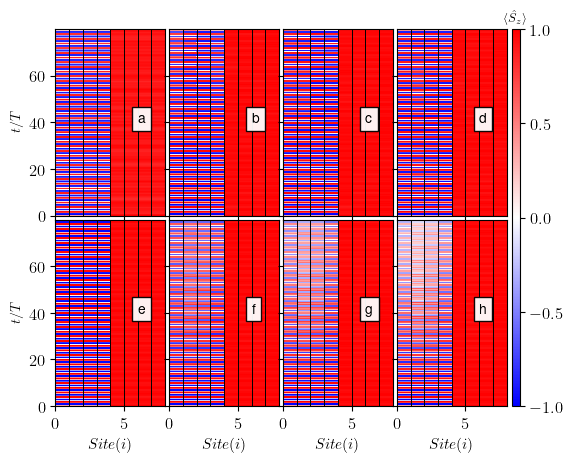

In [35]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
from funcs import *

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 801, endpoint=False)
ea, eb = 0.03, 0.9
g = np.pi/T
Jvalues = [0.2/T, 0.072/T]     
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.17,0.17,0.17,0.17]
hpt = jn_zeros(0,3)[0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']
lamb = 0.0
lambd_x = lamb
lambd_y = lamb

nprocs = N
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 
h0 = 0.0
ll = 0

fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols = (2,4),axes_pad = 0.04,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
sx,sy,sz = sigmax(), sigmay(), sigmaz()   
xx = 0
for jj,Jvalue in enumerate(Jvalues):    
    print('jvalue=',Jvalue)
    h = hpt * w/4
    datap = np.zeros((N, len(times)))
    for b, beta in enumerate(betas):
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        sz_os = [] 
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
        
        for m,i in enumerate(spinposition_B):
            idd = qeye(2**i)    
            dim12 = N-1-i
            id11 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(idd,tensor(sz,id11)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]
        
        data = p.map(run_dynm,params)
        for i in np.arange(N):
            datap[i] = data[i][0]        

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=10, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=11, labelpad = 4)
        grid[xx].set_ylabel(r'$t/T$', fontsize=10, labelpad = 4)
        xx=xx+1
cbticks = np.linspace(-1,1,5)
#plt.colorbar(imc, cax=grid.cbar_axes[0], label=r"$\langle\hat{S_z}\rangle$") 
clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 9)
figname = "comapision_at_resonace_strong_weak_N" + str(N) +'.pdf'
plt.savefig(figname,bbox_inches='tight', pad_inches=0.0, dpi = 600)

# rotational error eas = 0.05, 0.1

beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
CPU times: user 9.07 s, sys: 850 ms, total: 9.93 s
Wall time: 6min


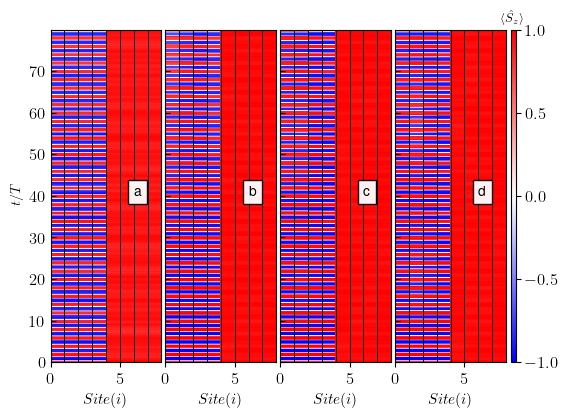

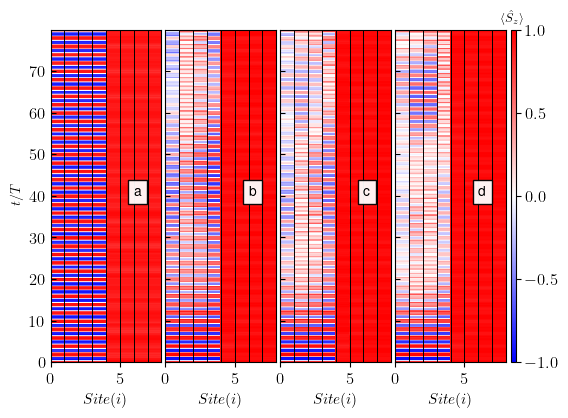

In [13]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
from funcs import *

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 801, endpoint=False)

eas = [0.03, .1]
eb = 0.9
ft = 10    # fintsize
g = np.pi/T
Jvalue = 0.2/T     # finite interaction strong coupling
#Jvalue = 0.072/T     # finite interaction weak coupling
#Jvalue = 0.0       # infinite interaction
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.3,0.3,0.3,0.3]
hpts = [jn_zeros(0,3)[0], 6.0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']

lamb = 0.0 
lambd_x = lamb
lambd_y = lamb

nprocs = N
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 

h0 = 0.0
ll = 0
sx,sy,sz = sigmax(), sigmay(), sigmaz()
xx = 0.0
for hh,ea in enumerate(eas):
    fig = plt.figure()
    grid = ImageGrid(fig, 111,nrows_ncols = (1,4),axes_pad = 0.04,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
    xx=0
    h = jn_zeros(0,3)[0] * w/4
    for b, beta in enumerate(betas):
        sz_os = [] 
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        datap = np.zeros((N, len(times)))
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
            
        for m,i in enumerate(spinposition_B):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]

        #data = p.map(run_dynm,tqdm(params, position=0, leave=True))
        data = p.map(run_dynm,params)
        for i in range(N):
            datap[i] = data[i][0]

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=10, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=11, labelpad=4)
        grid[xx].set_ylabel(r'$t/T$', fontsize=10, labelpad=4)
        
        #grid[xx].tick_params(which='both', axis="x", direction="in")
        grid[xx].tick_params(which='both', axis="y", direction="in")
        xx=xx+1

    cbticks = np.linspace(-1,1,5)
    #plt.colorbar(imc, cax=grid.cbar_axes[0], label=r"$\langle\hat{S_z}\rangle$") 
    clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
    clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 9)         
    figname = "eas_N_" + str(N) +'ea_'+ str(ea) + '.jpeg'
    figname1 = "eas_N_" + str(N) +'ea_'+ str(ea) + '.pdf'
    plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi = 600)
    plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0, dpi = 600)

## Robustness

Robustness of DTC-DL chimera in presence of addiaitonal external purtubative field at resonance point.
Comparison between strong and weak coulping.

This code is little bit differenct because I have applied the external static field at both H1 and H2.

In [14]:
from qutip import *
from scipy import signal
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool

##--- Energy per spin for interaction range order---------
def j_ij(Jvalue, i,j, beta):
    return Jvalue/(np.abs(i-j))**beta

##-- Drive-------------------------------------------------

def drive1(t, args):
    w = args['omega']
    T = 2 * np.pi/w

    sqr1 = signal.square(2 * np.pi/T * t)
    if sqr1 == -1:
        sqr1= 0
    return sqr1

def drive2(t, args):
    w = args['omega']
    T = 2 * np.pi/w

    sqr1 = -signal.square(2 * np.pi/T * t)
    if sqr1 == -1:
        sqr1= 0
    return sqr1

def drive3(t, args):    # square cos wave transverse
    w = args['omega']
    h0 = args['h0']
    h = args['h']
    T = 2 * np.pi/w

    sint = -np.sin(w*t)
    if sint<=0:
        sint = 0
    sqrsin = h0 + h * sint
    return sqrsin

def get_hamiltonian(N,N1, lambd_x, lambd_y, Jvalue, beta, g, ea, eb):
    sx,sy,sz = sigmax(), sigmay(), sigmaz()
    empt = qzero(2**N) + 1j * qzero(2**N)
    H10, H11, H12, H21, H22, H23, H24 =  empt, empt, empt, empt, empt, empt, empt
    
    ##-- Hamiltonian ------------------------------------------- 
    ##-- First half

    for i in range(N1):  
        id = qeye(2**i)    
        dim11 = N-1-i
        id1 = qeye(2**dim11)
        H11 = H11 + Qobj(tensor(id,tensor(sx,id1)).full()) * g * (1-ea)

    for i in range(N1,N):  
        id = qeye(2**i)    
        dim12 = N-1-i
        id1 = qeye(2**dim12)
        H12 = H12 + Qobj(tensor(id,tensor(sx,id1)).full()) * g * (1-eb)   

    ##-- Second half

    comb = combinations(np.arange(N), 2)
    for nm in list(comb):
        i,j= np.array(nm)
        id = qeye(2**i)
        dim11 = j-i-1
        id1 = qeye(2**dim11)
        dim12 = N-1-j
        id2 = qeye(2**dim12)
        H21 = H21 + Qobj(tensor(id, tensor(sy, tensor(id1, tensor(sy,id2)))).full()) * j_ij(Jvalue, i,j, beta)
        
    for i in range(N):  
        id = qeye(2**i)    
        dim22 = N-1-i
        id1 = qeye(2**dim22)
        H22 = H22 + Qobj(tensor(id,tensor(sz,id1)).full()) 

    for i in range(N):  
        id = qeye(2**i)    
        dim22 = N-1-i
        id1 = qeye(2**dim22)
        H23 = H23 + Qobj(tensor(id,tensor(sx,id1)).full()) * lambd_x

    for i in range(N):  
        id = qeye(2**i)    
        dim22 = N-1-i
        id1 = qeye(2**dim22)
        H24 = H24 + Qobj(tensor(id,tensor(sy,id1)).full()) * lambd_y
    
    return H11, H12, H21, H22, H23, H24

##-- Dynamics
def run_dynm(args):
    N,N1,lambd_x,lambd_y,Jvalue=args['N'],args['N1'],args['lambd_x'],args['lambd_y'],args['Jvalue']
    beta,g,ea,eb,w = args['beta'],args['g'],args['ea'],args['eb'],args['omega']
    h0,h,times,opts,sz_o = args['h0'],args['h'],args['times'],args['opts'], args['sz_o']
    
    H11, H12, H21, H22, H23, H24 =  get_hamiltonian(N,N1, lambd_x, lambd_y, Jvalue, beta, g, ea, eb)
    
    params = args
    
    H = [[H11,drive1],[H12,drive1],[H23, drive1],[H24, drive1], [H21,drive2], [H22,drive3], [H23,drive2], [H24,drive2]]
    grket = basis(2**N,0)        
    out = mesolve(H, grket, times, [], [sz_o], args = params)
    return out.expect

print("Function definition complete!!")

Function definition complete!!


jvalue= 0.12732395447351627
beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
jvalue= 0.3183098861837907
beta= 0.0 xx= 4
beta= 1.5 xx= 5
beta= 2.5 xx= 6
beta= inf xx= 7
CPU times: user 8.2 s, sys: 1.08 s, total: 9.28 s
Wall time: 12min 17s


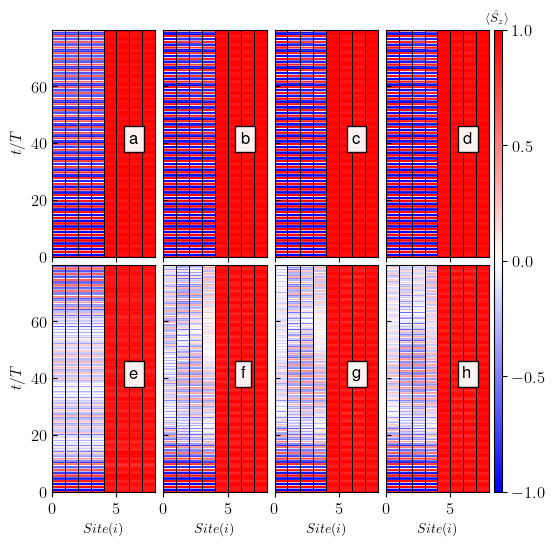

In [3]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 801, endpoint=False)
ea, eb = 0.03, 0.9
g = np.pi/T
Jvalues = [0.2/(5*T), 0.2/(2*T)]     
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.22,0.22,0.22,0.22]
hpt = jn_zeros(0,3)[0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']

nprocs = 2
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 
h0 = 0.0
ll = 0

fig = plt.figure()
grid = ImageGrid(fig, 111,nrows_ncols = (2,4),axes_pad = 0.08,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
sx,sy,sz = sigmax(), sigmay(), sigmaz()   
xx = 0
for jj,Jvalue in enumerate(Jvalues):
    lamb = Jvalue
    lambd_x = lamb
    lambd_y = lamb
    
    print('jvalue=',Jvalue)
    h = hpt * w/4
    datap = np.zeros((N, len(times)))
    for b, beta in enumerate(betas):
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        sz_os = [] 
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
        
        for m,i in enumerate(spinposition_B):
            idd = qeye(2**i)    
            dim12 = N-1-i
            id11 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(idd,tensor(sz,id11)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]
        
        data = p.map(run_dynm,params)
        for i in np.arange(N):
            datap[i] = data[i][0]
        

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=12, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=10)
        grid[xx].set_ylabel(r'$t/T$', fontsize=11)
        #grid[xx].tick_params(which='both', axis="x", direction="in")
        grid[xx].tick_params(which='both', axis="y", direction="in")
        xx=xx+1
    
cbticks = np.linspace(-1,1,5)
clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 9)  

figname = "robustness_bothH_N_" + str(N) +'.jpeg'
figname1 = "robustness_bothH_N_" + str(N) +'.pdf'
plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0, dpi = 600)

# robust fig horizontal side by side

jvalue= 0.12732395447351627
beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
jvalue= 0.3183098861837907
beta= 0.0 xx= 0
beta= 1.5 xx= 1
beta= 2.5 xx= 2
beta= inf xx= 3
CPU times: user 9.12 s, sys: 458 ms, total: 9.57 s
Wall time: 6min 1s


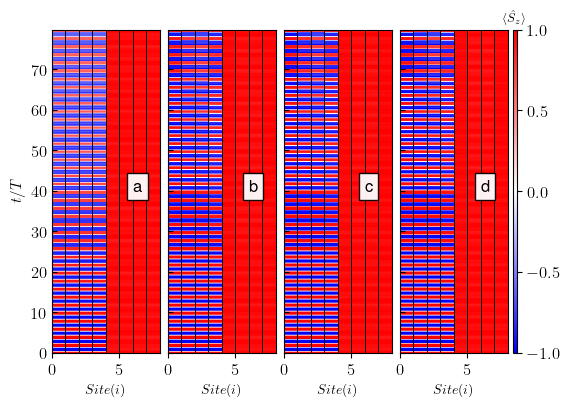

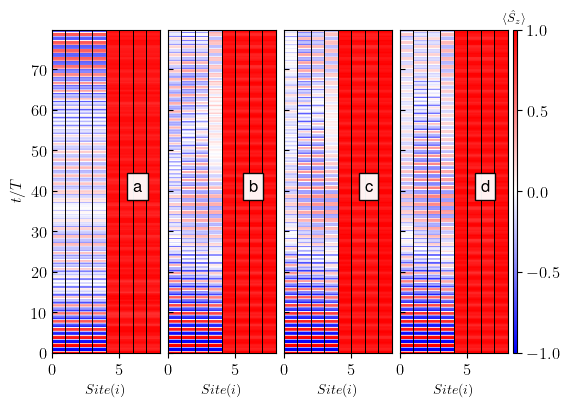

In [17]:
%%time
from qutip import sigmax, sigmay, sigmaz
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid

freezing_pts = jn_zeros(0, 5)
plt.rcParams.update({"figure.figsize": (6,6),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 12,"font.sans-serif": ["Helvetica"]})

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
times = np.linspace(0, 80 * T, 401, endpoint=False)
ea, eb = 0.03, 0.9
g = np.pi/T
Jvalues = [0.2/(5*T), 0.2/(2*T)]     
betas = [0.0, 1.5, 2.5, float('inf')]
asps = [0.3,0.3,0.3,0.3]
hpt = jn_zeros(0,3)[0]
labels = ['a','b', 'c', 'd', 'e', 'f', 'g', 'h']

nprocs = 4
p = Pool(processes = nprocs) 
opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)
spinposition_A = [0,1,2,3]
spinposition_B = [4,5,6,7] 
h0 = 0.0
ll = 0


sx,sy,sz = sigmax(), sigmay(), sigmaz()   
xx = 0
for jj,Jvalue in enumerate(Jvalues):
    
    fig = plt.figure()
    grid = ImageGrid(fig, 111,nrows_ncols = (1,4),axes_pad = 0.08,
                 cbar_location = "right",
                 cbar_mode="single",cbar_size="4%", cbar_pad=0.05
                )
    xx = 0
    lamb = Jvalue
    lambd_x = lamb
    lambd_y = lamb
    
    print('jvalue=',Jvalue)
    h = hpt * w/4
    datap = np.zeros((N, len(times)))
    for b, beta in enumerate(betas):
        xx = int(xx)
        print('beta=',beta,'xx=',xx)
        sz_os = [] 
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))
        
        for m,i in enumerate(spinposition_B):
            idd = qeye(2**i)    
            dim12 = N-1-i
            id11 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(idd,tensor(sz,id11)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_x':lambd_x,\
                   'lambd_y':lambd_y, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]
        
        data = p.map(run_dynm,params)
        for i in np.arange(N):
            datap[i] = data[i][0]
        

        imc = grid[xx].imshow(datap.T, aspect=asps[b],interpolation="nearest",\
                    cmap='bwr', origin='lower',extent = [0 , N, times[0]/T , times[-1]/T],\
                    vmax=1, vmin=-1)
        grid[xx].text(6, 40, labels[xx], fontsize=12, bbox=dict(facecolor='white', alpha=0.95))
        for i in range(N):
            grid[xx].axvline(i,color = 'black', linewidth=0.7)
        grid[xx].set_xlabel(r'$Site(i)$', fontsize=10)
        grid[xx].set_ylabel(r'$t/T$', fontsize=11)
        #grid[xx].tick_params(which='both', axis="x", direction="in")
        grid[xx].tick_params(which='both', axis="y", direction="in")
        xx=xx+1
    
    cbticks = np.linspace(-1,1,5)
    clb = plt.colorbar(imc, cax=grid.cbar_axes[0], ticks= cbticks) 
    clb.ax.set_title(label=r"$\langle\hat{S_z}\rangle$", fontsize = 9)  

    figname = "robustness_N_j" + str(Jvalue) +'.jpeg'
    figname1 = "robustness_N_j" + str(N) +'.pdf'
    plt.savefig(figname, bbox_inches='tight', pad_inches=0.0, dpi = 600)
    plt.savefig(figname1, bbox_inches='tight', pad_inches=0.0, dpi = 600)